In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set
Data includes stats from all NFL games(regular and postseason) from 200-2023.
## Key Data Points
- All games have two sets of data: One from the home team and one from the away.
- Season (Year the game occured)
    - Exact date of game also included
- Yards gained in each game
    - Total offensive yards
    - Pass yards
    - Rush yards
- Sack Information
    - Number of sacks
    - Yardage lost per sack
- Down information
    - Third down attempts/conversions
    - Fourth down attempts/conversions
- Turnover Information
    - Fumbles lost
    - Interceptions thrown
- Touchdown information
    - Total TDs
    - Pass TDs
    - Rush TDs
    - Does not include extra points/ 2 point conversions
- Notably no kicking/punting data is included in this data set

In [3]:
years = range(2000, 2024)
raw_stats = pd.concat([pd.read_csv(f'data/Stats-{year}.csv') for year in years], ignore_index=True)
drop_stats = raw_stats.drop(['nano', 'boxscore_stats_link', 'market', 'name'], axis='columns')
stats = drop_stats.replace({'LA':'LAR'})
stats['pass_cmp_pct'] = (stats['pass_cmp'] / stats['pass_att']).round(3)
stats['event_date'] = pd.to_datetime(stats['event_date'])
stats['event_day'] = stats['event_date'].dt.day_name()
stats['total_tds'] = stats['rush_tds'] + stats['pass_tds']
stats.head()

,season,event_date,alias,rush_att,rush_yds,rush_tds,pass_cmp,pass_att,pass_cmp_pct,pass_yds,...,first_downs,third_down_conv,third_down_att,third_down_conv_pct,fourth_down_conv,fourth_down_att,fourth_down_conv_pct,time_of_possession,event_day,total_tds
0,2000,2000-09-03,CHI,25,153,1,27,41,0.659,290,...,23,9,15,0.600,0,0,0.0,1954,Sunday,3
1,2000,2000-09-03,MIN,30,186,3,13,23,0.565,190,...,17,6,13,0.462,0,0,0.0,1646,Sunday,3
2,2000,2000-09-03,IND,32,119,1,22,32,0.688,273,...,20,6,13,0.462,0,0,0.0,1993,Sunday,2
3,2000,2000-09-03,KC,24,74,0,16,37,0.432,212,...,17,5,15,0.333,0,1,0.0,1607,Sunday,2
4,2000,2000-09-03,CAR,20,112,0,17,26,0.654,183,...,12,2,11,0.182,1,1,1.0,1606,Sunday,1


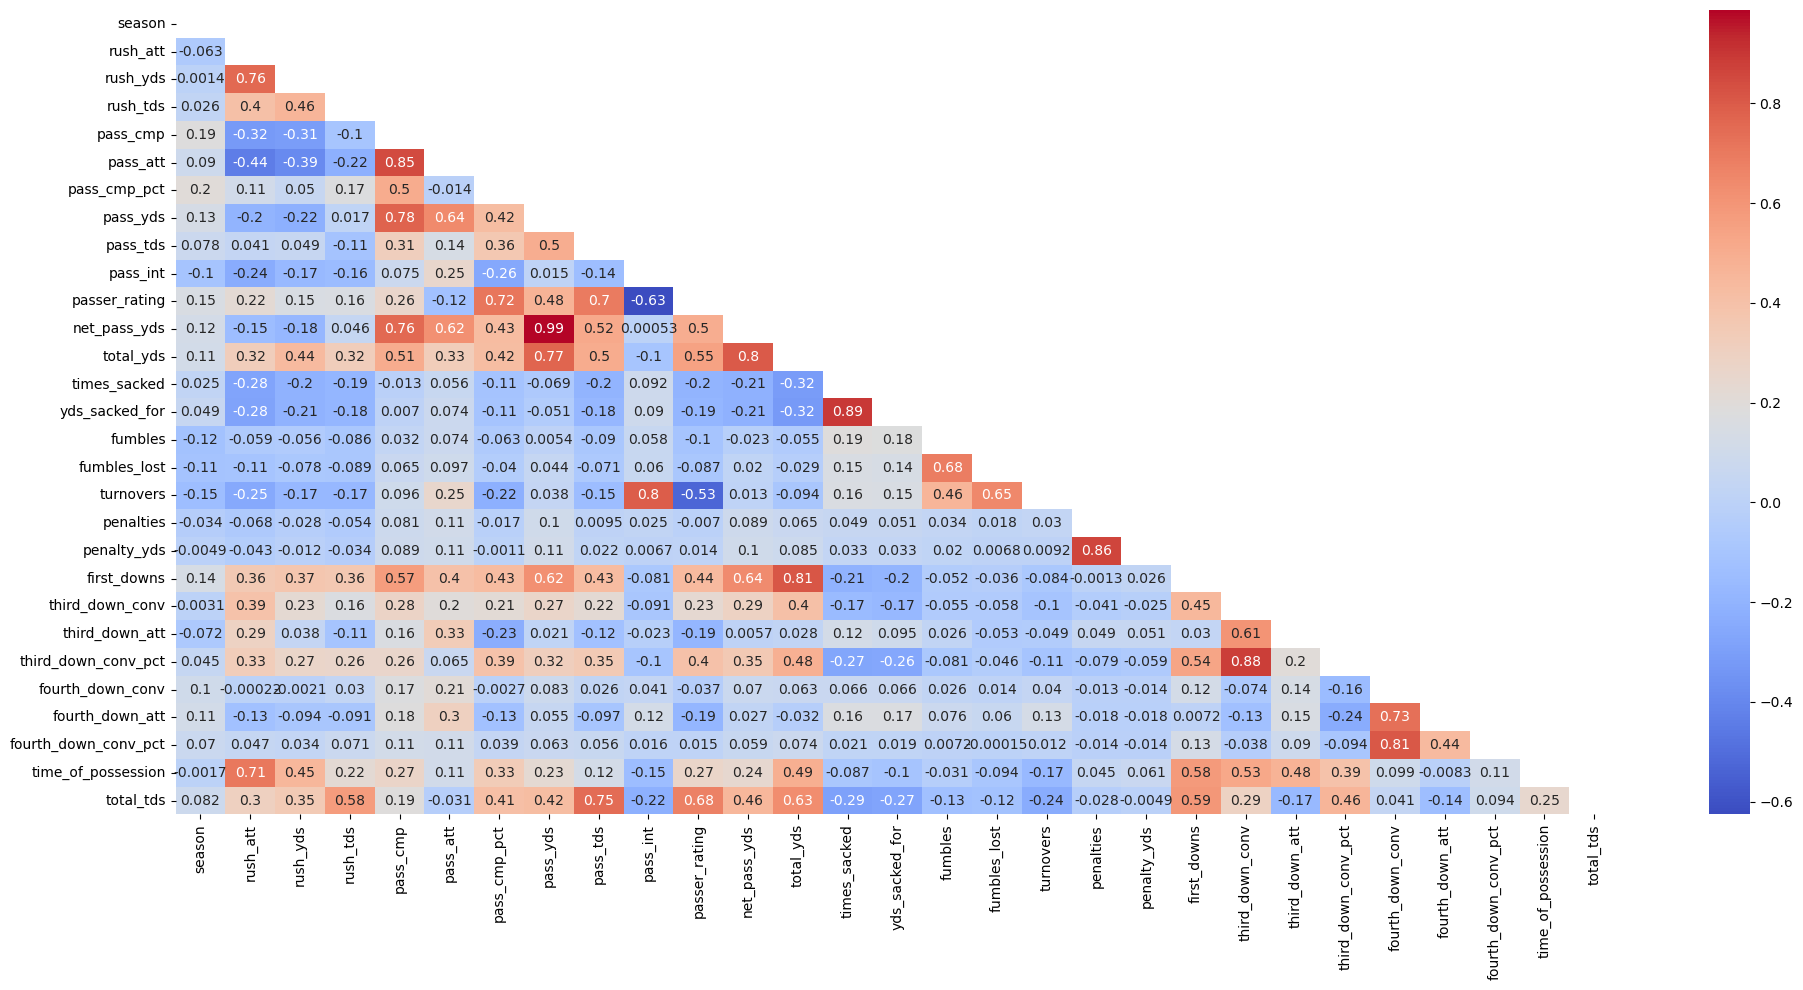

In [4]:
corr_matrix = stats.corr(numeric_only=True)
mask = np.triu(np.ones_like(stats.corr(numeric_only=True))) 
fig, ax = plt.subplots( figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.tight_layout()

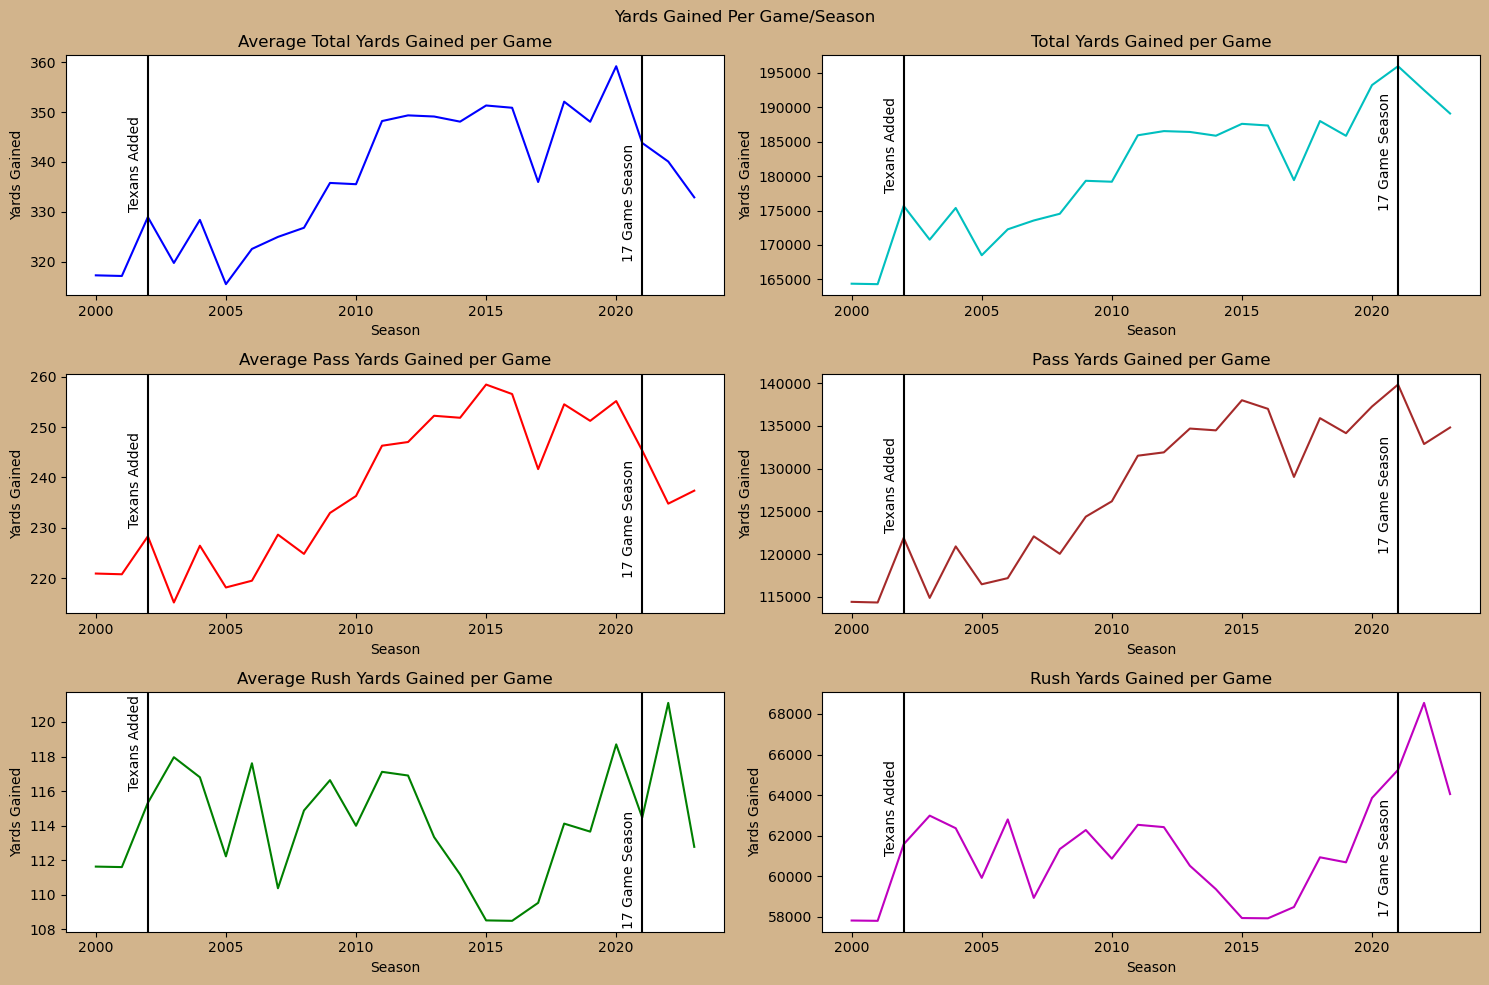

In [7]:
average_tot_yds = stats.groupby('season')['total_yds'].mean()
average_pass_yds = stats.groupby('season')['pass_yds'].mean()
average_rush_yds = stats.groupby('season')['rush_yds'].mean()

sum_tot_yds = stats.groupby('season')['total_yds'].sum()
sum_pass_yds = stats.groupby('season')['pass_yds'].sum()
sum_rush_yds = stats.groupby('season')['rush_yds'].sum()

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

average_tot_yds.plot(color='b', ax=axes[0,0])
average_pass_yds.plot(color='r', ax=axes[1,0])
average_rush_yds.plot(color='g', ax=axes[2,0])
sum_tot_yds.plot(color='c', ax=axes[0, 1])
sum_pass_yds.plot(color='brown', ax=axes[1, 1])
sum_rush_yds.plot(color='m', ax=axes[2, 1])

axes[0,0].set_title('Average Total Yards Gained per Game')
axes[0,0].set_ylabel('Yards Gained')
axes[0,0].set_xlabel('Season')
axes[0,0].axvline(x=2021, color='black', linestyle='-')
axes[0,0].text(2020.5, 320, '17 Game Season', rotation=90, verticalalignment='bottom', horizontalalignment='center')
axes[0,0].axvline(x=2002, color='black', linestyle='-')
axes[0,0].text(2001.5, 330, 'Texans Added', rotation=90, verticalalignment='bottom', horizontalalignment='center')

axes[1,0].set_title('Average Pass Yards Gained per Game')
axes[1,0].set_ylabel('Yards Gained')
axes[1,0].set_xlabel('Season')
axes[1,0].axvline(x=2021, color='black', linestyle='-')
axes[1,0].text(2020.5, 220, '17 Game Season', rotation=90, verticalalignment='bottom', horizontalalignment='center')
axes[1,0].axvline(x=2002, color='black', linestyle='-')
axes[1,0].text(2001.5, 230, 'Texans Added', rotation=90, verticalalignment='bottom', horizontalalignment='center')


axes[2,0].set_title('Average Rush Yards Gained per Game')
axes[2,0].set_ylabel('Yards Gained')
axes[2,0].set_xlabel('Season')
axes[2,0].axvline(x=2021, color='black', linestyle='-')
axes[2,0].text(2020.5, 108, '17 Game Season', rotation=90, verticalalignment='bottom', horizontalalignment='center')
axes[2,0].axvline(x=2002, color='black', linestyle='-')
axes[2,0].text(2001.5, 116, 'Texans Added', rotation=90, verticalalignment='bottom', horizontalalignment='center')


axes[0,1].set_title('Total Yards Gained per Game')
axes[0,1].set_ylabel('Yards Gained')
axes[0,1].set_xlabel('Season')
axes[0,1].axvline(x=2021, color='black', linestyle='-')
axes[0,1].text(2020.5, 175000, '17 Game Season', rotation=90, verticalalignment='bottom', horizontalalignment='center')
axes[0,1].axvline(x=2002, color='black', linestyle='-')
axes[0,1].text(2001.5, 177500, 'Texans Added', rotation=90, verticalalignment='bottom', horizontalalignment='center')


axes[1,1].set_title('Pass Yards Gained per Game')
axes[1,1].set_ylabel('Yards Gained')
axes[1,1].set_xlabel('Season')
axes[1,1].axvline(x=2021, color='black', linestyle='-')
axes[1,1].text(2020.5, 120000, '17 Game Season', rotation=90, verticalalignment='bottom', horizontalalignment='center')
axes[1,1].axvline(x=2002, color='black', linestyle='-')
axes[1,1].text(2001.5, 122500, 'Texans Added', rotation=90, verticalalignment='bottom', horizontalalignment='center')


axes[2,1].set_title('Rush Yards Gained per Game')
axes[2,1].set_ylabel('Yards Gained')
axes[2,1].set_xlabel('Season')
axes[2,1].axvline(x=2021, color='black', linestyle='-')
axes[2,1].text(2020.5, 58000, '17 Game Season', rotation=90, verticalalignment='bottom', horizontalalignment='center')
axes[2,1].axvline(x=2002, color='black', linestyle='-')
axes[2,1].text(2001.5, 61000, 'Texans Added', rotation=90, verticalalignment='bottom', horizontalalignment='center')

fig.set_facecolor(color='tan')
fig.suptitle('Yards Gained Per Game/Season')
fig.tight_layout();

## Notable Insights
- General upward trend in offensive production over time
    - Mostly through the air, pass yards increased overall from ~220/game to a peak around ~260/game
    - Rushing has been more turbulent, yet less of a change overall from ~112/game to a peak around ~120/game
- Decline in total yardage after both expansions of the NFL season
    - 32nd team added in 2002, the Houston Texans
    - Increased season length from 16 to 17 games in 2021
- Dip in rushing production from 2013-2017
- Large drop in overall production in 2017
    - Drop of nearly 20 pass yards/game
    - Rush yards had an increase, however it was less than one yard/game
- 2020 overall highest average and total yardage gained
    - Covid year, no crowds to create confusion through noise
## New Questions
- Why was there a drop after both expansions?
    - Potential answers:
        - Better defensive production
        - Increased length of season leading to a more tired team overall
        - Greater injury risk
- What caused the dip in 2017?
    - Fluke or was the NFL's average defense especially dominant that year?

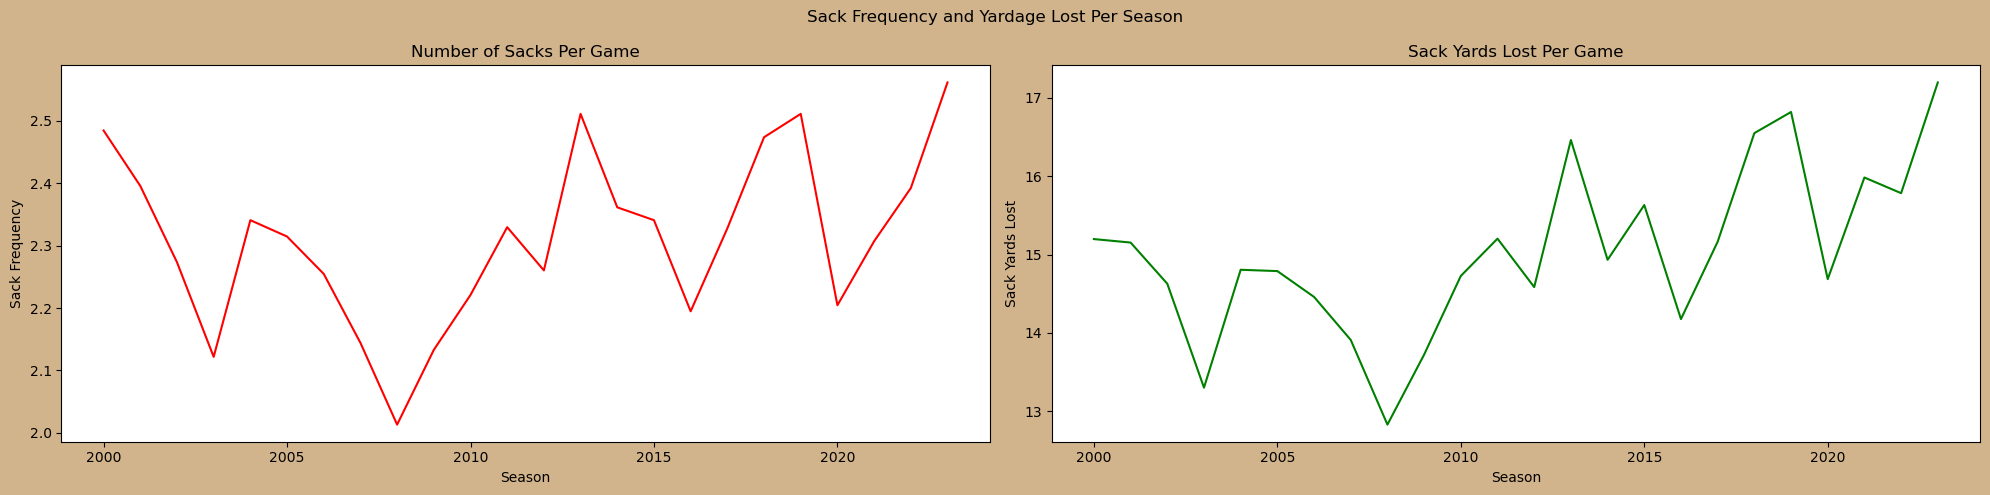

In [ ]:
sack_times = stats.groupby('season')['times_sacked'].mean()
sack_yds = stats.groupby('season')['yds_sacked_for'].mean()

fig, axes = plt.subplots(1,2, figsize=(20,5))

sack_times.plot(color='r', ax=axes[0])
sack_yds.plot(color='g', ax=axes[1])

axes[0].set_title('Number of Sacks Per Game')
axes[0].set_ylabel('Sack Frequency')
axes[0].set_xlabel('Season')

axes[1].set_title('Sack Yards Lost Per Game')
axes[1].set_ylabel('Sack Yards Lost')
axes[1].set_xlabel('Season')

fig.suptitle('Sack Frequency and Yardage Lost Per Season')
fig.set_facecolor(color='tan')
fig.tight_layout();

# 2017 Season decrease in overall yardage does not appear to be affected by sacks.
- While sack yards lost has generally increased over time, actual sack numbers tend to fluctuate between 2-2.5 sacks a game
- What about third/fourth down efficiency?

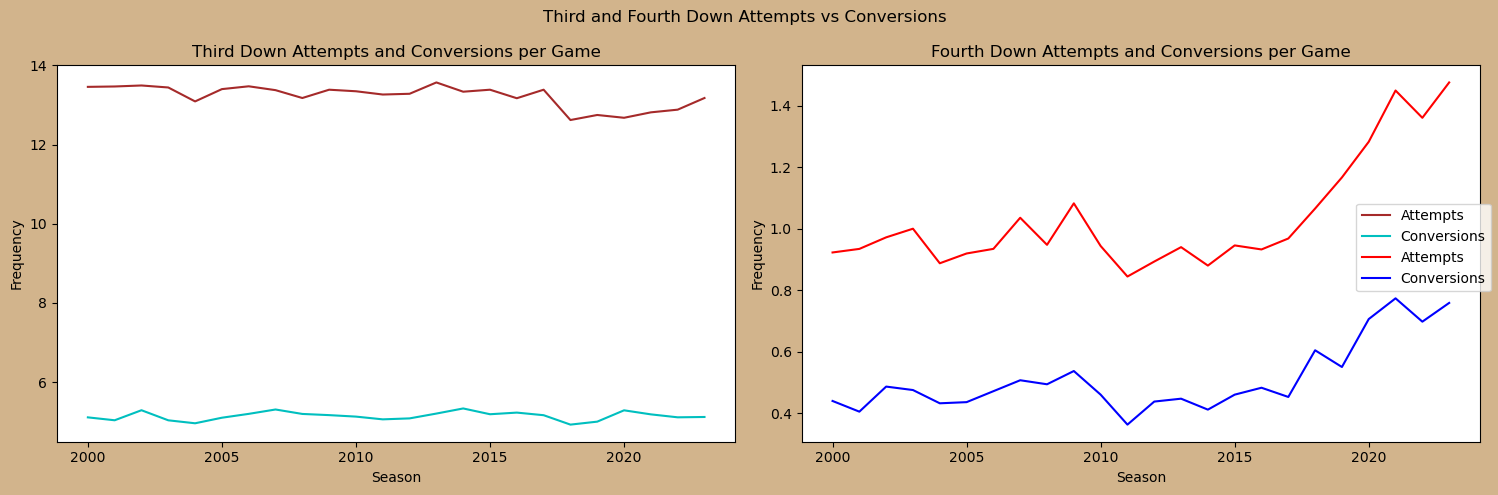

In [21]:
fourth_att = stats.groupby('season')['fourth_down_att'].mean()
fourth_conv = stats.groupby('season')['fourth_down_conv'].mean()
third_att = stats.groupby('season')['third_down_att'].mean()
third_conv = stats.groupby('season')['third_down_conv'].mean()

fig, axes = plt.subplots(1,2, figsize=(15, 5))

third_att.plot(color='brown', ax=axes[0], label='Attempts')
third_conv.plot(color='c', ax=axes[0], label="Conversions")

axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Season')
axes[0].set_title('Third Down Attempts and Conversions per Game')

fourth_att.plot(color='r', ax=axes[1], label='Attempts')
fourth_conv.plot(color='b', ax=axes[1], label="Conversions")
fig.suptitle('Third and Fourth Down Attempts vs Conversions')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Season')
axes[1].set_title('Fourth Down Attempts and Conversions per Game')

fig.set_facecolor(color='tan')
fig.legend(loc=7)
fig.tight_layout();

# Third down has remained relatively unchanged. Fourth down attempts and success has steadily increased
- Does not appear to have any significant in 2017 however

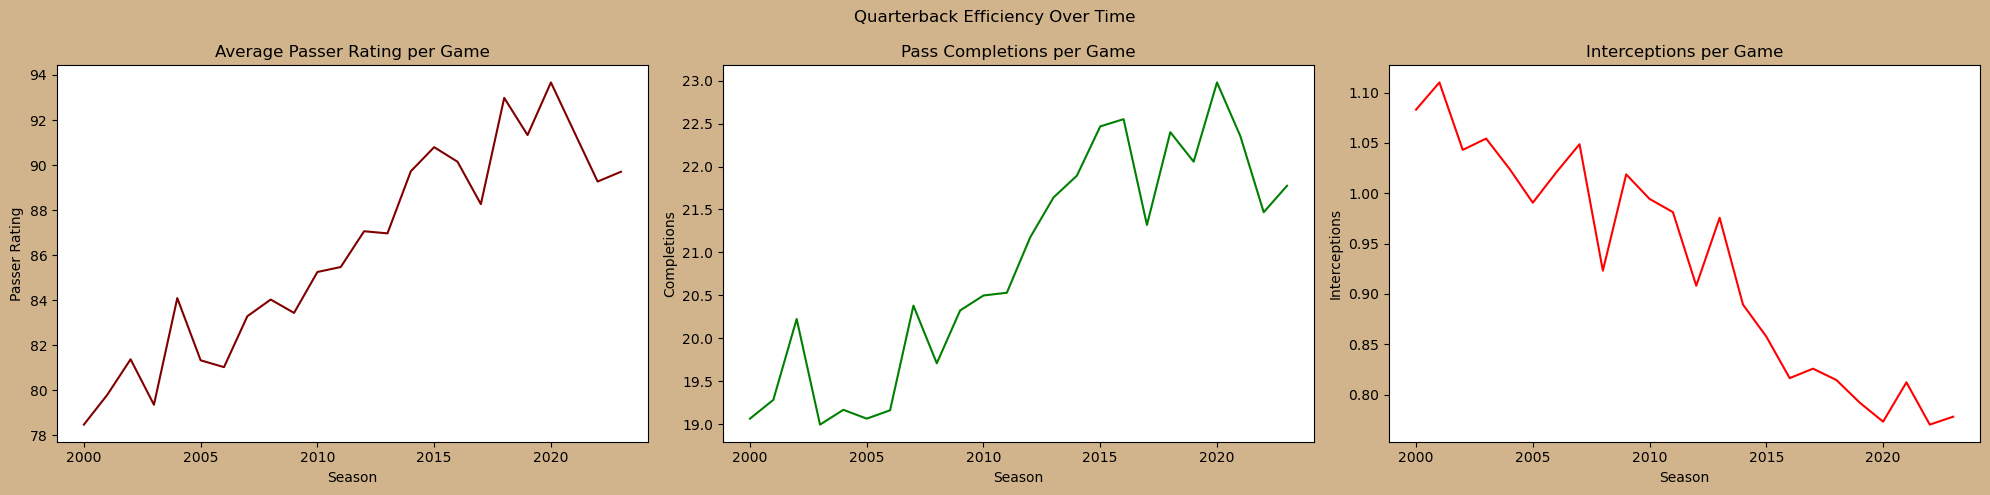

In [31]:
passer_rtg = stats.groupby('season')['passer_rating'].mean()
interceptions = stats.groupby('season')['pass_int'].mean()
pass_cmp = stats.groupby('season')['pass_cmp'].mean()

fig, axes = plt.subplots(1,3, figsize=(20,5))

passer_rtg.plot(color='maroon', ax=axes[0])
pass_cmp.plot(color='g', ax=axes[1])
interceptions.plot(color='r', ax=axes[2])

axes[0].set_title('Average Passer Rating per Game')
axes[0].set_ylabel('Passer Rating')
axes[0].set_xlabel('Season')

axes[1].set_title('Pass Completions per Game')
axes[1].set_ylabel('Completions')
axes[1].set_xlabel('Season')

axes[2].set_title('Interceptions per Game')
axes[2].set_ylabel('Interceptions')
axes[2].set_xlabel('Season')

fig.suptitle('Quarterback Efficiency Over Time')
fig.set_facecolor(color='tan')
fig.tight_layout();

# Overall quarterback efficiency has steadily increased over time
- Generally, QB efficiency has steadily increased, up to a peak in 2020
    - 2020 peak most likely due to less outside factors due to COVID
        - No live crowds
        - Less congested travel
    - What happened in 2017?
        - A significant drop in passer rating and completions
        - A slight rise in interceptions a game

# Final Insights
- 2017 was a horrible year for quarterback efficiency
- Most offensive stats have generally gotten better overtime
- Passing has been more influential than rushing so far this decade